In [85]:
%matplotlib inline

In [201]:
from astropy.table import Table, Column
from astropy.coordinates import SkyCoord  # High-level coordinates
from astropy.coordinates import ICRS, Galactic, FK4, FK5  # Low-level frames
from astropy.coordinates import Angle, Latitude, Longitude  # Angles
import astropy.units as u
import astropy.coordinates as coord
import numpy as np
import matplotlib.pyplot as plt

In [203]:
plotpar = {
           'axes.labelsize': 17,
           'axes.titlesize' : 17,
           'font.size': 10,
           'legend.fontsize': 17,
           'xtick.labelsize': 17,
           'ytick.labelsize': 17,
           'text.usetex': False,
}
plt.rcParams.update(plotpar)


In [205]:
df = Table.read('../catalogs/Combined/main_table_stars_with_rvs_n_errors.vot')
df

main_table_oid,main_oid,source_id,Mass,Per,Rad,ra,dec,ruwe,reference,logAge,SpType,Lstar,ruwe_2,rv_amplitude_robust,ipd_frac_multi_peak,parallax,pm,pmra,pmdec,phot_g_mean_mag,bp_rp,radial_velocity,radial_velocity_error,ruwe_f,ipd_f,rv_robust_f,v_z,rv_amp_bin,abs_Mag,reMass,parallax_error,pmra_error,pmdec_error,radial_velocity_error_2,re_v_z,re_v_z_error,age_est
,,,solMass,d,solRad,deg,deg,,,[yr],,0.01 solLum,,km / s,,mas,mas / yr,mas / yr,mas / yr,mag,mag,km / s,km / s,,,,,,,,mas,mas / yr,mas / yr,km / s,,,
int32,int32,int64,float32,float64,float32,float64,float64,float64,str8,float32,str6,float32,float32,float32,int16,float64,float32,float64,float64,float32,float32,float32,float32,int64,int64,int64,float64,int64,float64,float64,float32,float32,float32,float32,float64,float64,float64
1,1,2797745549200763520,0.44,4.79,0.45,4.06432,19.85704,1.554,Newton17,--,,--,1.5539801,55.223293,6,65.10811689055409,1044.6532,714.6345511276562,-761.9696674473287,10.908869,2.841834,6.9795403,3.902364,1,1,1,-49.80906158947147,1,9.97704446223993,0.51,0.041267276,0.046937995,0.041962754,3.902364,-49.77708211127059,1.3383402322111848,3.88791941110811
2,2,2859027409595355776,0.26,1.08,0.27,6.14834,30.04158,1.298,Newton17,--,,--,1.2977159,22.453743,0,51.316075949778615,585.9754,585.8907544586369,9.959853297532621,12.960726,3.1202898,10.285248,1.3245473,0,0,1,5.945556708153161,0,11.511992980482372,0.37,0.042310424,0.050504275,0.03205134,1.3245473,5.963363016706932,0.6523170468104627,0.13651482217685157
3,3,416158489625704320,0.42,52.82,0.43,8.97791,52.68592,1.382,Newton17,--,,--,1.3819181,3.9425075,2,41.170241007502874,798.139,777.168600019981,-181.75470165920962,11.530065,2.390316,-0.6372399,0.21027899,0,1,1,-13.192910481385432,0,9.602981629485956,0.55,0.03242564,0.02499476,0.02480002,0.21027899,-13.184130298114876,0.17113720641363064,0.5235301601216552
4,4,2779735823615714176,0.3,34.01,0.32,9.89131,14.90545,1.462,Newton17,--,,--,1.4623499,14.191612,0,34.81687111605054,333.7426,331.9076871660051,34.94894273834515,12.900315,2.784772,3.5010433,0.75865865,1,0,1,5.498893225545977,0,10.609263983929928,0.45,0.031152343,0.033893805,0.02495529,0.75865865,5.5090020934913095,0.19293300511758874,0.1260775275725947
5,5,2779735819320035840,0.33,1.59,0.34,9.89231,14.90984,9.76,Newton17,--,,--,9.759859,37.42855,0,34.257941698203155,328.88693,327.53892627570303,29.746753158291376,12.961825,3.0671816,4.04884,1.9026254,1,0,1,5.019406935260629,0,10.635631700426684,0.45,0.21735539,0.24737093,0.21139015,1.9026254,5.030151829009192,0.4847795038958183,0.10515231455970787
6,8,374400957846408192,0.67,0.25,0.67,15.91794,40.85738,9.285,Newton17,--,,--,9.28536,18.88665,1,32.81128216805046,195.86702,115.99952125547368,-157.82267852136772,10.131072,1.7057018,-16.219627,1.7936746,1,0,1,-27.856391040024707,1,7.711188052692503,0.69,0.19001044,0.18309243,0.108840354,1.7936746,-27.834478698529296,1.1908822725878423,1.6903125209408714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
815,2194,2611163717366876544,0.55,1.6,0.47,342.58046,-7.08964,1.085,Wright,--,,--,1.0850837,0.68982315,0,68.93028118372844,148.73949,-106.57232266763265,103.75824912054978,9.132903,1.9275532,-5.9487762,0.15217462,0,0,1,7.815310863636578,0,8.324953349524073,0.63,0.019456035,0.022454634,0.022502972,0.15217462,7.815283614711265,0.019378722544213477,0.223856142726959


In [207]:
rv_org_f = df['rv_robust_f'] == 1

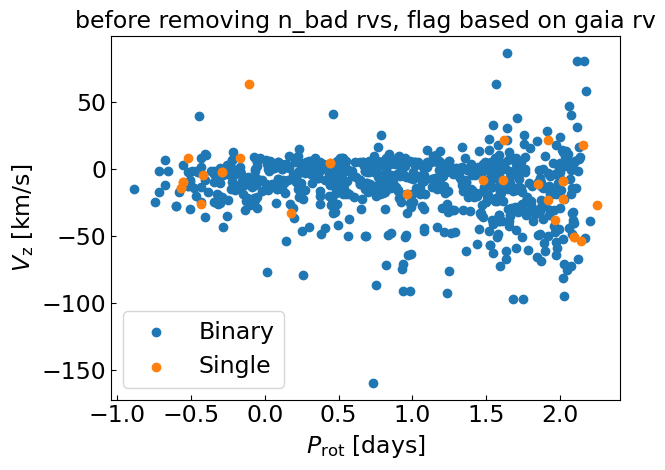

In [209]:
plt.scatter(np.log10(df['Per'][rv_org_f]), df['v_z'][rv_org_f], label = 'Binary')
plt.scatter(np.log10(df['Per'][~rv_org_f]), df['v_z'][~rv_org_f], label = 'Single')
plt.title('Vertical velocity')
plt.tick_params(which='both', direction='in')
plt.xlabel(r'$P_{\rm rot}$ [days]')
plt.ylabel(r'$V_{\rm z}$ [km/s]')
plt.title('before removing n_bad rvs, flag based on gaia rv')

plt.legend()
plt.tight_layout()
plt.show()

In [210]:
mask_bin1 = df['ruwe_f'] == 1
mask_bin2 = df['ipd_f'] == 1
mask_bin3 = df['rv_amp_bin'] == 1

mask_Binary = (df['ruwe_f'] + df['ipd_f'] + df['rv_amp_bin']) == 1


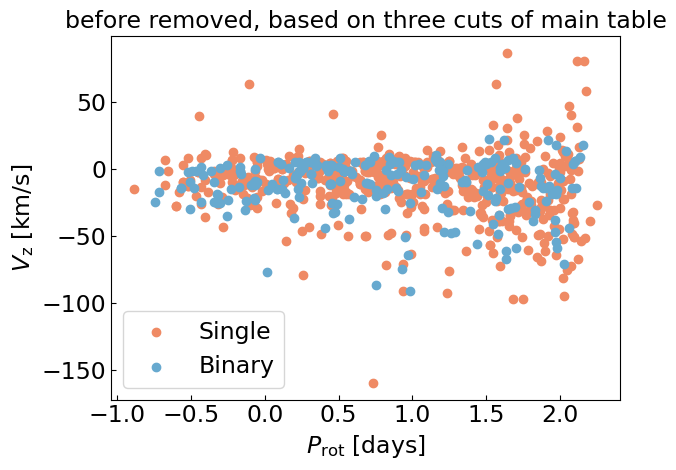

In [211]:
plt.scatter(np.log10(df['Per'][~mask_Binary]), df['v_z'][~mask_Binary], label = 'Single', color='#ef8a64')
plt.scatter(np.log10(df['Per'][mask_Binary]),df['v_z'][mask_Binary], label = 'Binary', color='#67a9cf')

plt.title('Vertical velocity')
plt.tick_params(which='both', direction='in')
plt.xlabel(r'$P_{\rm rot}$ [days]')
plt.ylabel(r'$V_{\rm z}$ [km/s]')
plt.title('before removed, based on three cuts of main table')

plt.legend()
plt.tight_layout()
plt.show()

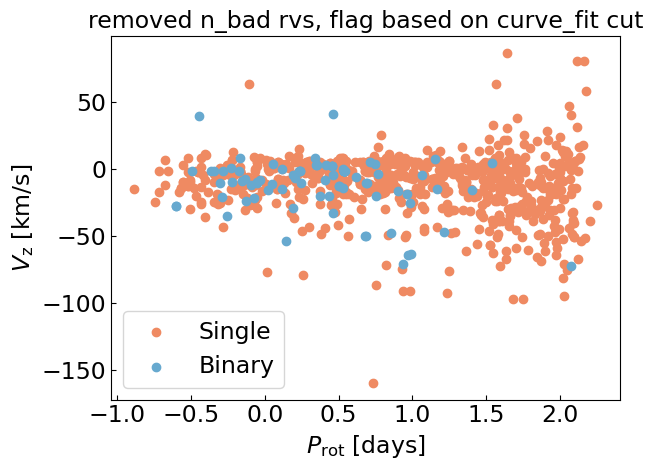

In [214]:
plt.scatter(np.log10(df['Per'][~mask_bin3]), df['v_z'][~mask_bin3], label = 'Single', color='#ef8a62')
plt.scatter(np.log10(df['Per'][mask_bin3]), df['v_z'][mask_bin3], label = 'Binary', color='#67a9cf')

plt.title('Vertical velocity')
plt.tick_params(which='both', direction='in')
plt.xlabel(r'$P_{\rm rot}$ [days]')
plt.ylabel(r'$V_{\rm z}$ [km/s]')
plt.title('removed n_bad rvs, flag based on curve_fit cut')

plt.legend()
plt.tight_layout()
plt.show()

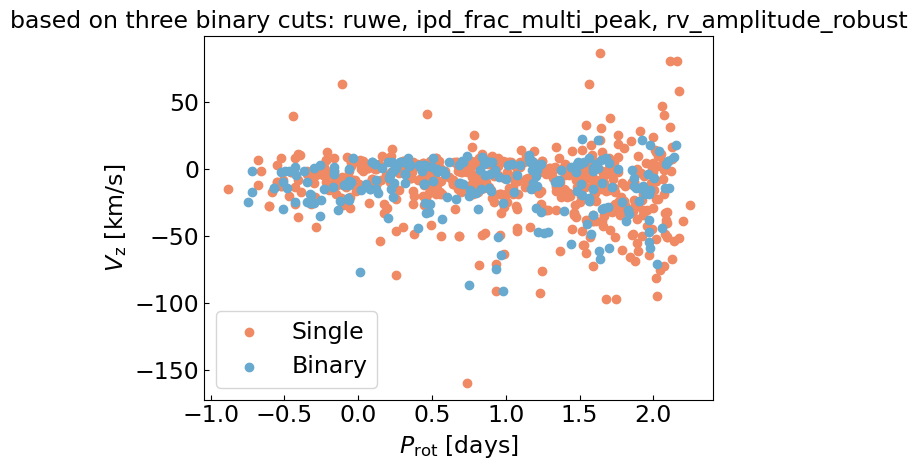

In [215]:
plt.scatter(np.log10(df['Per'][~mask_Binary]), df['v_z'][~mask_Binary], label = 'Single', color='#ef8a64')
plt.scatter(np.log10(df['Per'][mask_Binary]), df['v_z'][mask_Binary], label = 'Binary', color='#67a9cf')
# plt.scatter(np.log10(new_df['Per'][mask1]), new_df['v_z'][mask1], label = 'Binary ruwe', marker = 'o', color='#fff7bc')
# plt.scatter(np.log10(new_df['Per'][mask2]), new_df['v_z'][mask2], label = 'Binary ipd', marker = 'x', color='#fec44f')
# plt.scatter(np.log10(new_df['Per'][mask3]), new_df['v_z'][mask3], label = 'Binary rv_amp', marker = '^', color='#d95f0e')

plt.title('Vertical velocity')
plt.tick_params(which='both', direction='in')
plt.xlabel(r'$P_{\rm rot}$ [days]')
plt.ylabel(r'$V_{\rm z}$ [km/s]')
plt.title('based on three binary cuts: ruwe, ipd_frac_multi_peak, rv_amplitude_robust')

plt.legend()
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'v_z error bar plot')

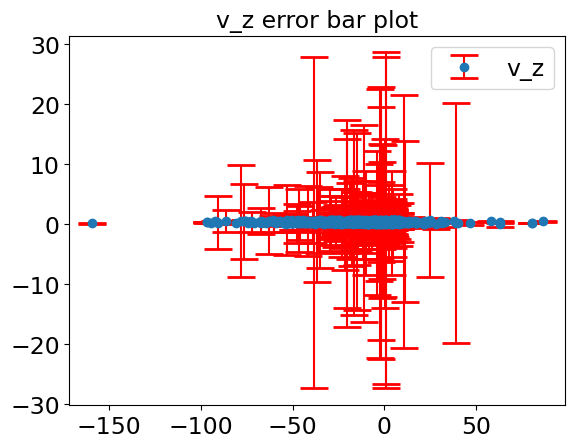

In [217]:
plt.errorbar(df['re_v_z'], df['Mass'], yerr = df['re_v_z_error'], fmt='o', capsize=10, capthick=2, ecolor='red', label = 'v_z')
plt.legend()
plt.title('v_z error bar plot')

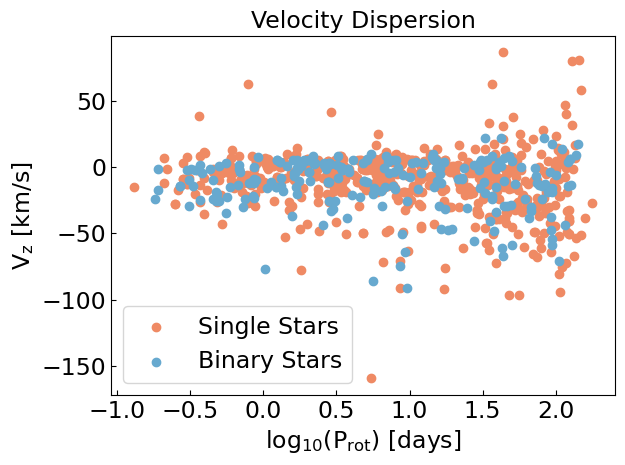

In [228]:
plt.scatter(np.log10(df['Per'][~mask_Binary]), df['re_v_z'][~mask_Binary], label = 'Single Stars', color='#ef8a64')
plt.scatter(np.log10(df['Per'][mask_Binary]), df['re_v_z'][mask_Binary], label = 'Binary Stars', color='#67a9cf')
plt.legend()
plt.xlabel(r'$\rm{log_{10}(P}_{\rm rot} )}$ [days]')
plt.ylabel(r'$\rm{V}_{\rm z}$ [km/s]')
plt.title('Velocity Dispersion')
plt.tight_layout()
plt.tick_params(direction='in')

plt.savefig('../plots/presentation/velocity_dispersion.png')

Text(0.5, 1.0, 'using recalculated v_z, based on rv_amp_flag')

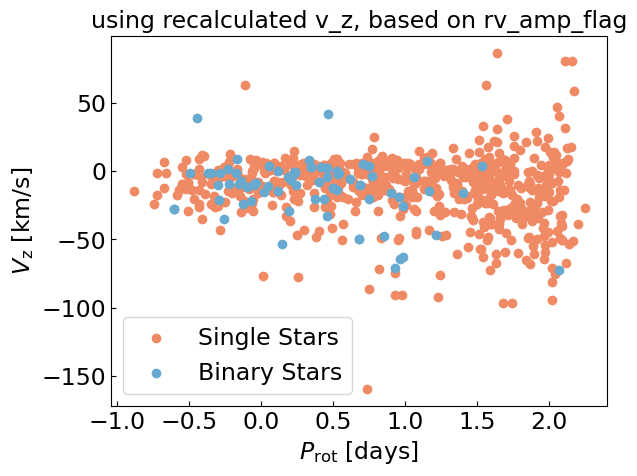

In [220]:
plt.scatter(np.log10(df['Per'][~mask_bin3]), df['re_v_z'][~mask_bin3], label = 'Single Stars', color='#ef8a64')
plt.scatter(np.log10(df['Per'][mask_bin3]), df['re_v_z'][mask_bin3], label = 'Binary Stars', color='#67a9cf')
plt.legend()
plt.xlabel(r'$P_{\rm rot}$ [days]')
plt.ylabel(r'$V_{\rm z}$ [km/s]')
plt.tick_params(direction='in')
plt.title('using recalculated v_z, based on rv_amp_flag')